In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

"""
Dataset Kaggle
https://www.kaggle.com/harlfoxem/housesalesprediction

Referencias
https://www.kaggle.com/bsivavenu/house-price-calculation-methods-for-beginners?select=test.csv
https://www.uv.es/webgid/Descriptiva/43_normal.html
https://www.disfrutalasmatematicas.com/datos/desviacion-estandar.html
https://nextjournal.com/schmudde/how-to-remove-outliers-in-data
https://stackoverflow.com/questions/4761623/changing-the-color-of-the-axis-ticks-and-labels-for-a-plot-in-matplotlib
"""

In [ ]:
# Load CSV as Dataframe
df = pd.read_csv('kc_house_data.csv')  # load data set
print(df.dtypes)

In [ ]:
# Plot correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax=.8, annot=True)
plt.tick_params(colors='black')
plt.show()

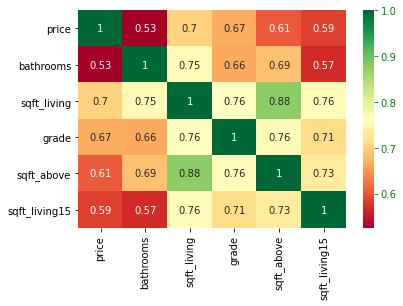

In [111]:
# Print most correlated features
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["price"]) > 0.5]
plt.figure()
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.tick_params(colors='black')
plt.show()


 mu (media) = 540088.14 and sigma (std des) = 367118.70



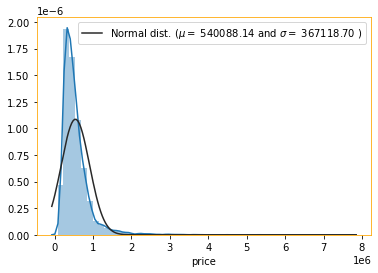

In [112]:
# Print normal distribution for price
sns.distplot(df['price'], fit=norm)

(mu, sigma) = norm.fit(df['price'])
print('\n mu (media) = {:.2f} and sigma (std des) = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.tick_params(colors='black')
plt.show()

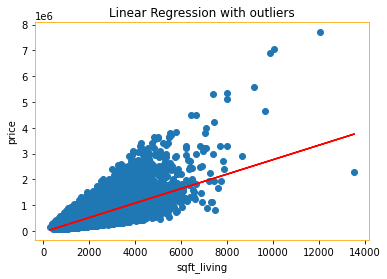

In [114]:
# First Linear Regression
X = df.iloc[:, 5].values.reshape(-1, 1)
Y = df.iloc[:, 2]

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.title("Linear Regression with outliers")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(X, Y_pred, color='red')
plt.tick_params(colors='black')
plt.show()


In [115]:
# Remove outliers
Y_no_o = df.sqft_living[df.sqft_living.between(df.sqft_living.quantile(.10), df.sqft_living.quantile(.90))]
new_df = df.iloc[Y_no_o.axes[0]]

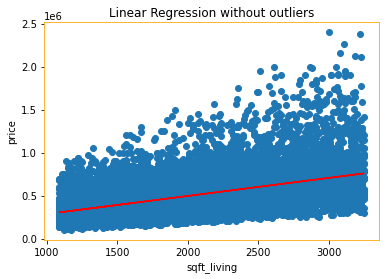

In [116]:
# Print Linear regression withou outliers
X = new_df.iloc[:, 5].values.reshape(-1, 1)
Y = new_df.iloc[:, 2]

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.title("Linear Regression without outliers")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(X, Y_pred, color='red')
plt.tick_params(colors='black')
plt.show()